<a href="https://colab.research.google.com/github/SuanandaYogi/Python_Tutorial/blob/master/Sesi%202-4%20-%20Grid%20Search%202D%20dan%20Diagram%20Wadati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pemodelan Kedepan 2D

$$t_i = t_{0} + \frac{{\sqrt {{{\left( {{x_i} - x_s} \right)}^2} + {{\left( {{y_i} - y_s} \right)}^2} } }}{v }$$

<img src="images/Wadati.png" alt="Wadati" style="width: 400px;"/>

In [2]:
#memanggil modul numpy dan matplotlib.pyplot

import numpy as np
import matplotlib.pyplot as plt

In [197]:
#membuat fungsi pemodelan kedepan waktu tiba gelombang gempa bumi pada kasus 1D

def fw_waktu_2d(t_0,coor_s,coor_i):
    #xs adalah posisi sumber (km)
    #xi adalah posisi stasiun ke-i (km)
    xi = coor_i[0]
    yi = coor_i[1]
    xs = coor_s[0]
    ys = coor_s[1]
    vp = 7 #kecepatan gelombang gempa (P) 7km/s
    t = t_0+np.sqrt((xi-xs)**2+(yi-ys)**2)/vp #menghitung waktu tiba gelombang gempa pada stasiun ke-i
    return t #output nilai t dijadikan hasil perhitungan fungsi

In [169]:
#kita uji fungsi tersebut
fw_waktu_2d(310,[0,0],[7,7])

311.4142135623731

In [170]:
def Fungsi_RMS(d_cal,d_obs):
    jumlah = 0
    N = d_obs.size
    for it in range(N):
        kuadratdd = (d_cal[it]-d_obs[it])**2 #melakukan perhitungan d_cal dan d_obs ke-i
        jumlah = jumlah + kuadratdd

    rata2 = jumlah/N
    RMS = np.sqrt(rata2)
    return RMS

## Trial and Error Forward modeling

Dengan posisi stasiun yang sama, kita mencatat sebuah kejadian gempa bumi dengan data waktu tiba berikut 

|Stasiun | X (km) | Y (km) | Waktu tiba (T<sub>P</sub>)| Waktu tiba (T<sub>S</sub>)|
|-|-|-|-|-|
|1|35|9|00:07:02.09|00:07:8.01|
|2|-44|10|00:07:00.70|00:07:5.60|
|3|-23|-39|00:06:59.37|00:07:3.30|

Coba tentukan posisi sumber gempa bumi dengan cara di atas.

In [172]:
#mencari t_0 dengan Diagram Wadati

In [173]:
tp_obs = np.array([7*60+2.09 , 7*60+0.70, 6*60+59.37])
ts_obs = np.array([7*60+8.01, 7*60+5.60, 7*60+3.30])

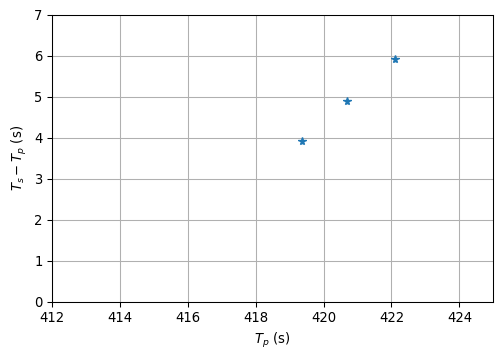

In [174]:
tsp = ts_obs-tp_obs

plt.figure(dpi=95)
plt.plot(tp_obs,tsp,'*')
plt.ylim(0,7)
plt.xlim(412,425)
plt.xlabel(r'$T_p$ (s)')
plt.ylabel(r'$T_s-T_p$ (s)')
plt.grid()
plt.show()

In [175]:
#cari persamaan garis ax+b = y

In [179]:
G = np.array([[422.09,1],[420.7,1],[419.37,1]])
d = np.reshape(tsp,(-1,1)) 

#proses inversi

#operasi untuk menyederhanakan perhitungan kita pisah-pisah perhitungan dan digabung di akhir
GT = G.T #proses transposisi matriks G
GTG = np.dot(GT,G) 
GTd = np.dot(GT,d)

#perhitungan final

m = np.dot(np.linalg.inv(GTG),GTd)

print('matriks m')
print('a =',m[0,0],'dan b =',m[1,0])

#t_0 saat y = 0

t_0 = (0 - m[1,0])/m[0,0] 
print('waktu terjadi gempa bumi',t_0,'s')


matriks m
a = 0.7316341423652375 dan b = -302.8964497091947
waktu terjadi gempa bumi 413.9998835073315 s


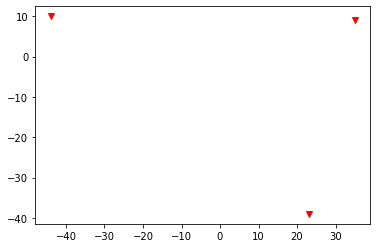

In [201]:
# Plot posisi stasiun untuk memperkirakan rentang pencarian

t_obs = tp_obs

posisi_stasiun = np.array([[35,9],[-44,10],[23,-39]])

plt.figure()
for it in range(N_stasiun):
    plt.plot(posisi_stasiun[it,0],posisi_stasiun[it,1],'rv')
plt.show()

In [203]:
#print('dimensi matriks posisi_stasiun',posisi_stasiun.shape)
N_stasiun = posisi_stasiun.shape[0]

#menentukan rentang pencarian
jumlah_sampel = 100
x_range = np.linspace(-60,50,num=jumlah_sampel)
y_range = np.linspace(-50,20,num=jumlah_sampel)

#kita siapkan array RMS untuk menyimpan proses uji coba
list_RMS = np.zeros((jumlah_sampel,jumlah_sampel))

In [191]:
for it_x in range(jumlah_sampel):
    for it_y in range(jumlah_sampel):
        posisi_sumber = np.array([x_range[it_x],y_range[it_y]]) #posisi sumber gempa bumi

        t_cal = np.zeros(N_stasiun) #menyiapkan array kosong untuk menyimpan data simulasi 
        for it in range(N_stasiun):
            t_cal[it] = fw_waktu_2d(t_0,posisi_sumber,posisi_stasiun[it])

        #menghitung RMS dengan fungsi sebelumnya
        list_RMS[it_y,it_x] = Fungsi_RMS(t_cal,t_obs) 

In [192]:
Best_RMS = list_RMS[0,0]
Best_source = np.array([x_range[0],y_range[0]])

for it_x in range(jumlah_sampel):
    for it_y in range(jumlah_sampel):
        if list_RMS[it_y,it_x] <  Best_RMS:
            Best_RMS = list_RMS[it_y,it_x]
            Best_source =  np.array([x_range[it_x],y_range[it_y]])

print('RMS terkecil',Best_RMS,'Pada posisi',Best_source)

RMS terkecil 0.03211698782564742 Pada posisi [-11.11111111 -23.83838384]


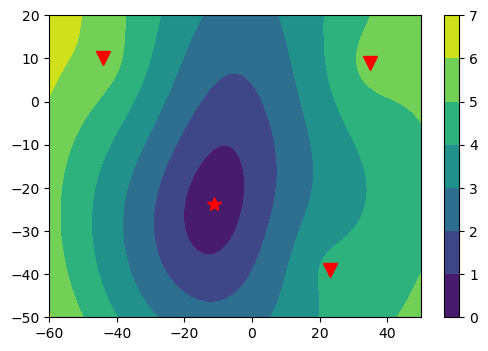

In [193]:
coor_xx,coor_yy = np.meshgrid(x_range,y_range)

plt.figure(dpi=100)
plt.contourf(coor_xx,coor_yy,list_RMS)
for it in range(N_stasiun):
    plt.plot(posisi_stasiun[it,0],posisi_stasiun[it,1],'rv',ms=10)
plt.plot(Best_source[0],Best_source[1],'r*',ms=10)
plt.colorbar()
plt.show()


RMS terkecil 0.002299837637964083 Pada posisi [-11.31313131 -23.63636364]


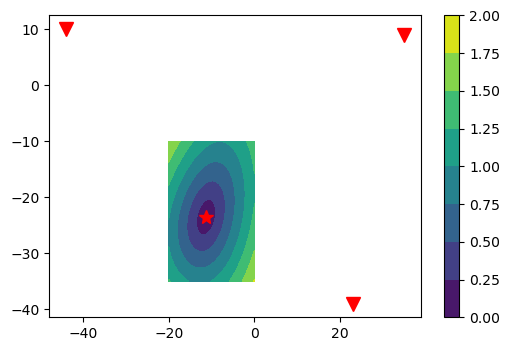

In [195]:
#kita definisikan posisi sumber dan stasiun

t_obs = tp_obs

posisi_stasiun = np.array([[35,9],[-44,10],[23,-39]])

#print('dimensi matriks posisi_stasiun',posisi_stasiun.shape)
N_stasiun = posisi_stasiun.shape[0]
        
jumlah_sampel = 100
x_range = np.linspace(-20,0,num=jumlah_sampel)
y_range = np.linspace(-35,-10,num=jumlah_sampel)

#kita siapkan array RMS untuk menyimpan proses uji coba
list_RMS = np.zeros((jumlah_sampel,jumlah_sampel))
for it_x in range(jumlah_sampel):
    for it_y in range(jumlah_sampel):
        posisi_sumber = np.array([x_range[it_x],y_range[it_y]]) #posisi sumber gempa bumi

        t_cal = np.zeros(N_stasiun) #menyiapkan array kosong untuk menyimpan data simulasi 
        for it in range(N_stasiun):
            t_cal[it] = fw_waktu_2d(t_0,posisi_sumber,posisi_stasiun[it])

        #menghitung RMS dengan fungsi sebelumnya
        list_RMS[it_y,it_x] = Fungsi_RMS(t_cal,t_obs)
Best_RMS = list_RMS[0,0]
Best_source = np.array([x_range[0],y_range[0]])

for it_x in range(jumlah_sampel):
    for it_y in range(jumlah_sampel):
        if list_RMS[it_y,it_x] <  Best_RMS:
            Best_RMS = list_RMS[it_y,it_x]
            Best_source =  np.array([x_range[it_x],y_range[it_y]])

print('RMS terkecil',Best_RMS,'Pada posisi',Best_source)
coor_xx,coor_yy = np.meshgrid(x_range,y_range)

plt.figure(dpi=100)
plt.contourf(coor_xx,coor_yy,list_RMS)
for it in range(N_stasiun):
    plt.plot(posisi_stasiun[it,0],posisi_stasiun[it,1],'rv',ms=10)
plt.plot(Best_source[0],Best_source[1],'r*',ms=10)
plt.colorbar()
plt.show()
